In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import libs

# Blood Count Processing

In [3]:
blood_count_df = pd.read_csv("/home/avivwe@mta.ac.il/blood_count_features.csv")

## Check for na and remove them

In [4]:
blood_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502370 entries, 0 to 502369
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   White blood cell (leukocyte) count               19409 non-null  float64
 1   Red blood cell (erythrocyte) count               19408 non-null  float64
 2   Haemoglobin concentration                        19410 non-null  float64
 3   Haematocrit percentage                           19410 non-null  float64
 4   Mean corpuscular volume                          19410 non-null  float64
 5   Mean corpuscular haemoglobin                     19409 non-null  float64
 6   Mean corpuscular haemoglobin concentration       19409 non-null  float64
 7   Red blood cell (erythrocyte) distribution width  19410 non-null  float64
 8   Platelet count                                   19410 non-null  float64
 9   Platelet crit             

In [5]:
blood_count_df.dropna(inplace=True)

In [6]:
blood_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13715 entries, 35 to 502341
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   White blood cell (leukocyte) count               13715 non-null  float64
 1   Red blood cell (erythrocyte) count               13715 non-null  float64
 2   Haemoglobin concentration                        13715 non-null  float64
 3   Haematocrit percentage                           13715 non-null  float64
 4   Mean corpuscular volume                          13715 non-null  float64
 5   Mean corpuscular haemoglobin                     13715 non-null  float64
 6   Mean corpuscular haemoglobin concentration       13715 non-null  float64
 7   Red blood cell (erythrocyte) distribution width  13715 non-null  float64
 8   Platelet count                                   13715 non-null  float64
 9   Platelet crit                  

## Plot The histogram of the feature to under stand the behavior of the features

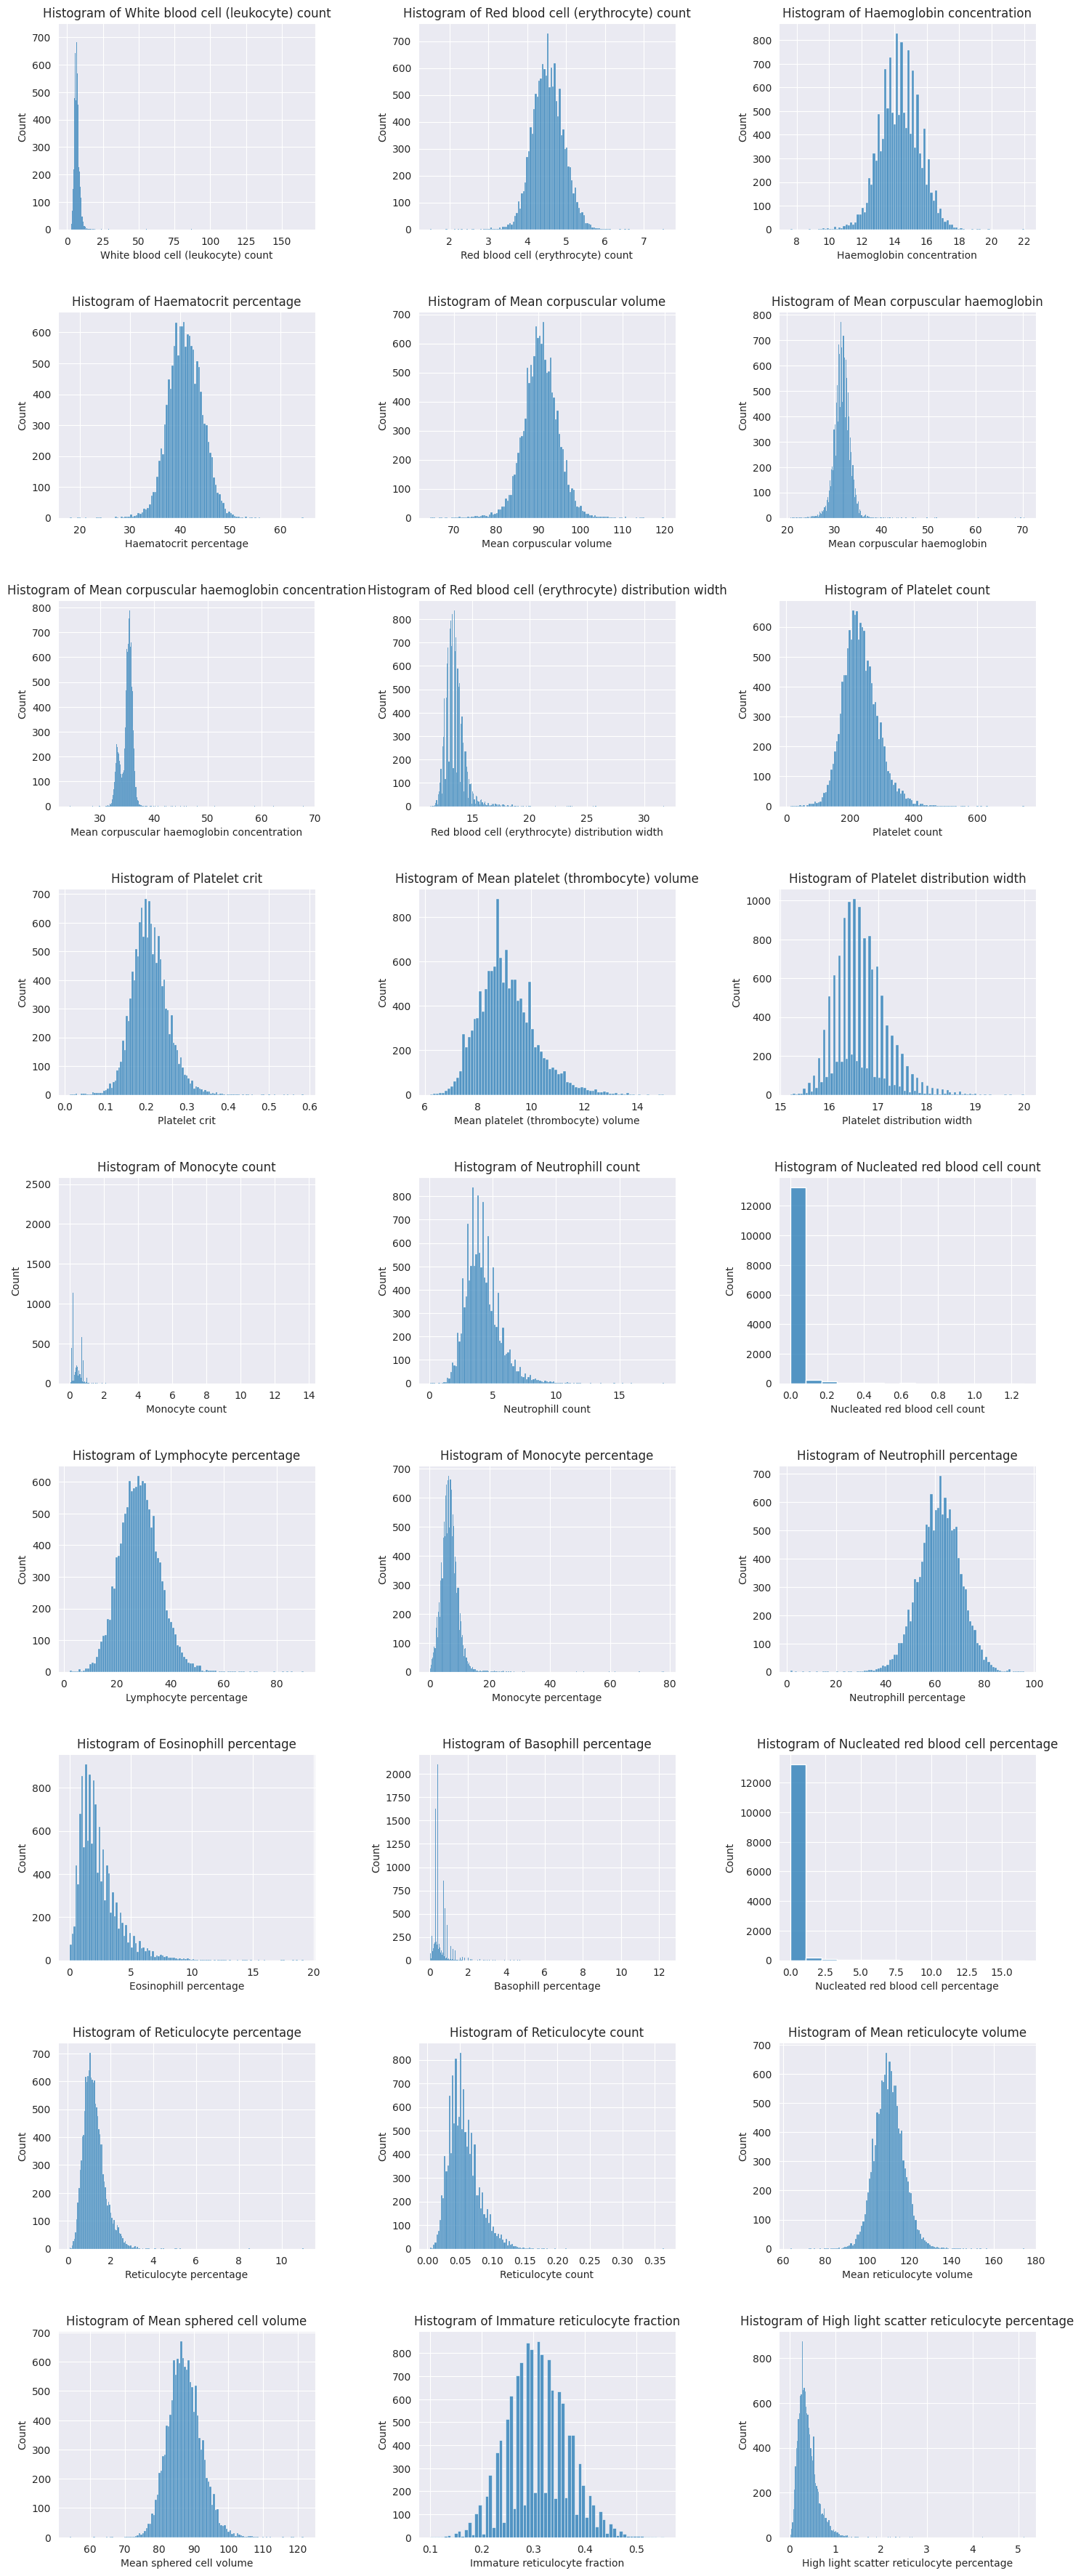

In [7]:
num_plots = len(blood_count_df.columns)
cols = 3  # You can adjust how many plots you want per row
rows = num_plots // cols + int(num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
fig.tight_layout(pad=4.0)

for i, column in enumerate(blood_count_df.columns):
    ax = axes[i // cols, i % cols]
    sns.histplot(blood_count_df[column], kde=False, ax=ax)
    ax.set_title(f'Histogram of {column}')

# Adjust subplot parameters for better layout
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

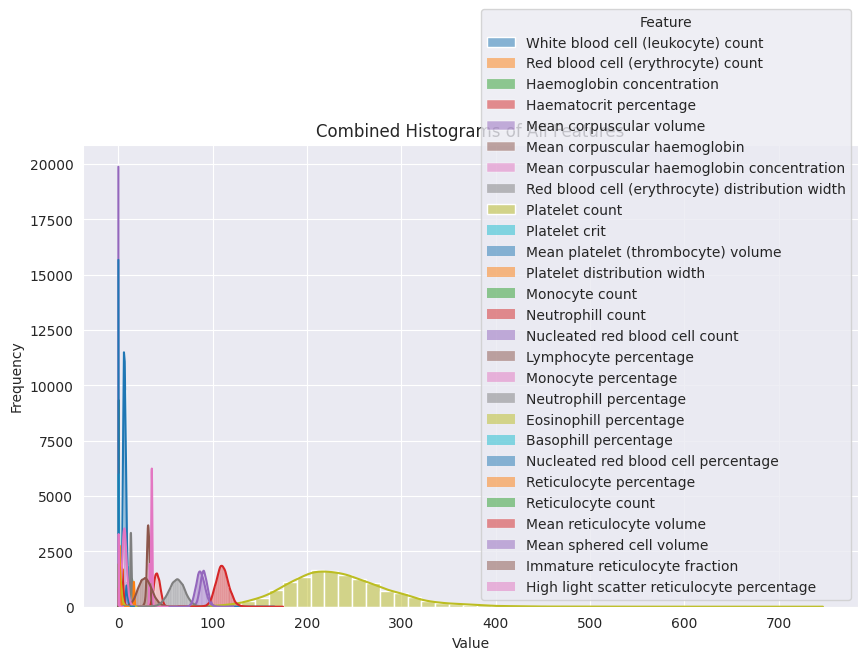

In [9]:
plt.figure(figsize=(10, 6))

for column in blood_count_df.columns:
    sns.histplot(blood_count_df[column], label=column, alpha=0.5, kde=True, bins=50)

plt.title('Combined Histograms of All Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Feature')
plt.show()

## Look for high correlation between feature to do feature selection

In [10]:
corr = blood_count_df.corr()


In [11]:
corr = np.where((corr >= 0.5) | (corr <= -0.5), 1, 0)

<Axes: >

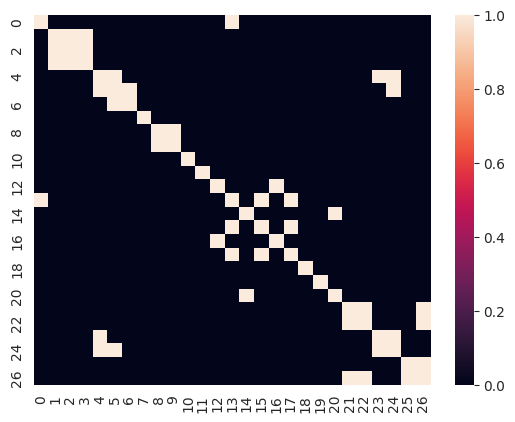

In [13]:
sns.heatmap(corr)